# Exercise 6.2: Histograms, Box Plots, & Bullet Charts
#### Anuj Tanwar
#### DSC640 - 02/26/2023

# Plots Using **Python**

## Load Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Load data
birthDF = pd.read_csv("ex6-2/birth-rate.csv")
educaDF = pd.read_csv("ex6-2/education.csv")
edumelt = pd.read_csv("ex6-2/education_pivot.csv")
scoresNE = pd.read_csv("ex6-2/education_summary.csv")
textDF = pd.read_csv("ex6-2/clean_text.csv", encoding='cp1252')

# Set color to Blue
color = "#0000FF"

<div style="page-break-after: always;"></div>

## Histogram

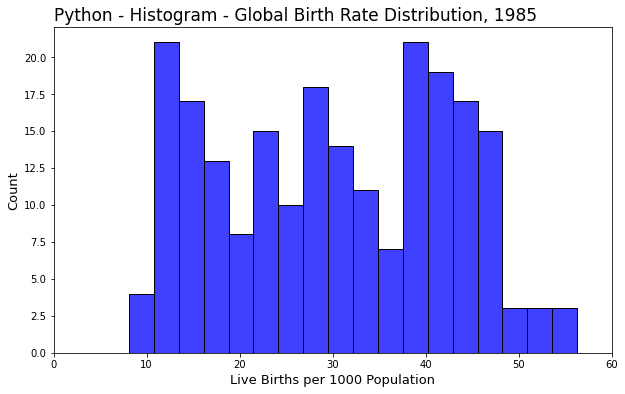

In [3]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
sns.histplot(birthDF, x="1985", bins=18, color=color)

# Add chart title and labels
plt.title("Python - Histogram - Global Birth Rate Distribution, 1985", 
          fontsize = 17, loc = 'left')
plt.xlabel("Live Births per 1000 Population", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.xlim(0,60)  # Set min and max for x-axis

plt.show()

<div style="page-break-after: always;"></div>

## Box Plot

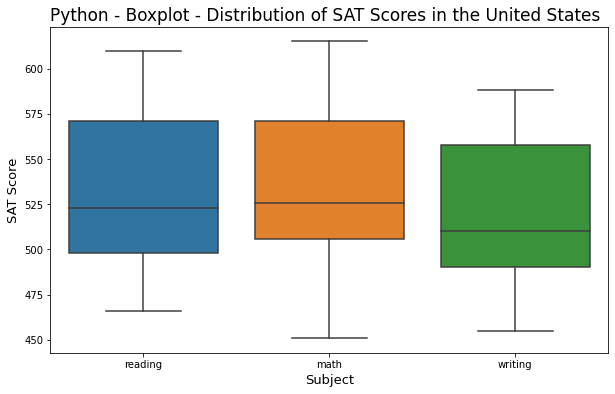

In [4]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Create box plot
sns.boxplot(x=edumelt['variable'], y=edumelt['value'])

# Add chart title and labels
plt.title("Python - Boxplot - Distribution of SAT Scores in the United States", 
          fontsize = 17, loc = 'left')
plt.xlabel("Subject", fontsize = 13)
plt.ylabel("SAT Score", fontsize = 13)

plt.show()

<div style="page-break-after: always;"></div>

## Bullet Chart

In [5]:
# Prepare data for graphing
lims = [scoresNE.iloc[0,4], scoresNE.iloc[0,2], scoresNE.iloc[0,8]]
data_to_plt = (scoresNE.iloc[0,0], scoresNE.iloc[0,1], scoresNE.iloc[0,6])

In [6]:
# Build a color palette
palette = sns.light_palette(color, len(lims)+2, reverse=True)

Text(0.5, 0, 'SAT Score')

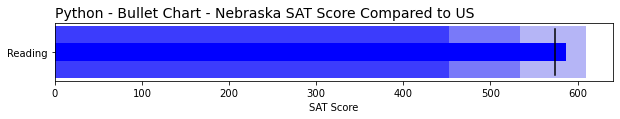

In [7]:
# Build the stacked bar chart of the ranges
fig, ax = plt.subplots(figsize=(10,3))
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plt[0]])

prev_limit = 0
for idx, lim in enumerate(lims):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=60, color=palette[idx+1])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plt[1], color=palette[0], height=20)

# Add the target marker
ax.axvline(data_to_plt[2], color="black", ymin=0.10, ymax=0.9)

# Add title and labels
plt.title("Python - Bullet Chart - Nebraska SAT Score Compared to US", 
          fontsize = 14, loc = 'left')
# fig.suptitle("Nebraska SAT Score Compared to US", fontsize=14)
ax.set_xlabel("SAT Score")

<div style="page-break-after: always;"></div>

## BYO Chart: Word Cloud

In [8]:
# Concatenate text
text = ''
for i in range(len(textDF['X'])):
    text += textDF['X'][i]

In [9]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

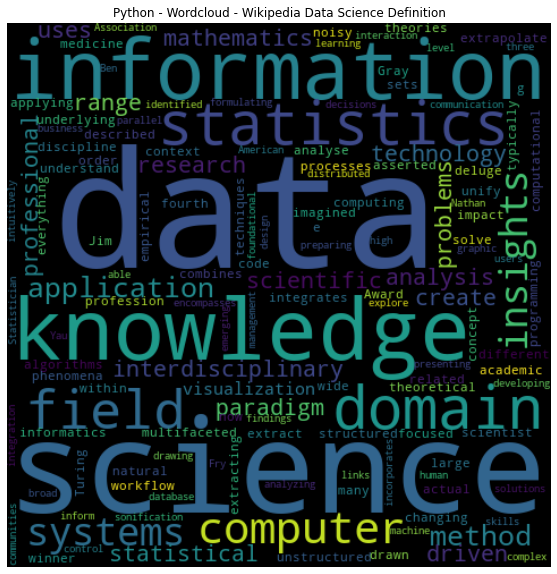

In [10]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Python - Wordcloud - Wikipedia Data Science Definition")
plt.show()